# MNIST Digit Classification with a Fully-Connected Neural Network
*By Carlos Santiago Bañón*

**Year:** 2020

**Technologies:** Python, NumPy, Matplotlib, TensforFlow, Keras

**Discipline(s):** Computer Vision, Deep Learning

**Keywords:** `classification`, `computer-vision`, `deep-learning`, `fully-connected`, `mnist`, `multi-class-classification`, `neural-network`

This notebook presents an MNIST digit classifier built with a fully-connected neural network in TensorFlow and Keras.

## 1. Import Statements

---



In [71]:
import numpy as np
import matplotlib.pyplot as plt

#%tensorflow_version 2.x
import tensorflow as tf

## 2. Data Preprocessing

---



The first step is to preprocess our data. Here, we load the MNIST digit dataset from the Keras datasets library, split it into training and test sets, reshape the matrices, and encode the labels categorically.

In [72]:
# Load the MNIST dataset.
mnist = tf.keras.datasets.mnist
train_data, test_data = mnist.load_data()

In [74]:
# Divide the data into features and labels.
train_images, train_labels = train_data
test_images, test_labels = test_data

In [75]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

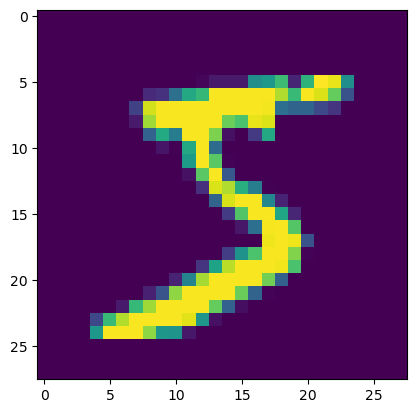

In [76]:
plt.imshow(train_images[0])
plt.show()

In [77]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [78]:
train_images.shape

(60000, 28, 28)

In [79]:
# Reshape and normalize the images.
X_train = train_images.reshape((60000, 784))
X_train = X_train.astype('float32') / 255
X_test = test_images.reshape((10000, 784))
X_test = X_test.astype('float32') / 255

In [80]:
# Reshape the labels and encode them categorically.
y_train = tf.keras.utils.to_categorical(train_labels)
y_test = tf.keras.utils.to_categorical(test_labels)

In [81]:
train_labels[0]

5

In [82]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

Further, the following are the shapes of each matrix, as well as a visualization of a random MNIST digit.

In [83]:
# Show the shapes of the data.
print("Training Images:", X_train.shape)
print("Testing Images:", X_test.shape)
print("Training Labels:", y_train.shape)
print("Test Labels:", y_test.shape)

Training Images: (60000, 784)
Testing Images: (10000, 784)
Training Labels: (60000, 10)
Test Labels: (10000, 10)


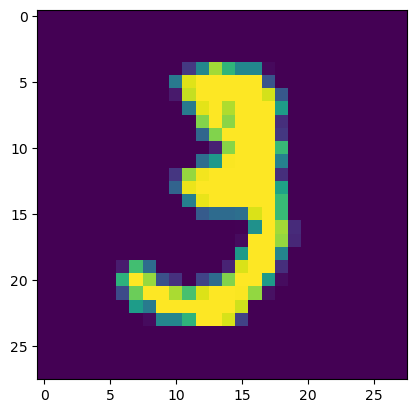

In [54]:
# Show a sample MNIST digit.
plt.imshow(train_images[10])
plt.show()

## 3. Neural Network

---



### 3.1. Define the Model

We then have to define our neural network. Here, we define a sequential model with two fully-connected layers.

In [84]:
# Define the sequential model.
model = tf.keras.models.Sequential()

In [85]:
# Add two fully-connected layers to the network.
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [86]:
# Show the model.
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Once our model is defined, we can compile it using the Adam optimizer and the categorical cross-entropy loss function.

In [87]:
# Compile the model.
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

### 3.2. Train the Model

We then train the model on 10 epochs, using a batch size of 256.

In [88]:
# Define the parameters.
num_epochs = 10
batch_size = 256

# Train the model.
history = model.fit(X_train, 
                      y_train, 
                      epochs=num_epochs, 
                      batch_size=batch_size, 
                      validation_data=(X_test, y_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.8443 - loss: 0.5440 - val_accuracy: 0.9481 - val_loss: 0.1698
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9562 - loss: 0.1521 - val_accuracy: 0.9659 - val_loss: 0.1167
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9719 - loss: 0.0995 - val_accuracy: 0.9735 - val_loss: 0.0880
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9808 - loss: 0.0688 - val_accuracy: 0.9757 - val_loss: 0.0808
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9860 - loss: 0.0502 - val_accuracy: 0.9735 - val_loss: 0.0792
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9887 - loss: 0.0401 - val_accuracy: 0.9812 - val_loss: 0.0602
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9908 - loss: 0.0321 - val_accuracy: 0.9820 - val_loss: 0.0585
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9933 - loss: 0.0255 - val_acc

### 3.3. Display the Metrics

Finally, we display the metrics. We begin by displaying the model's accuracy and loss based on the test set.

In [89]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9773 - loss: 0.0731
Test Accuracy: 0.9810000061988831
Test Loss: 0.061377570033073425


Then, we save the metric values for each epoch to plot the loss and accuracy curves for our model.

In [61]:
# Save the metrics.
metrics = history.history

Finally, once we have our metric history, we can plot the curves.

In [62]:
# Save the loss values.
training_loss_list = metrics['loss']
test_loss_list = metrics['val_loss']

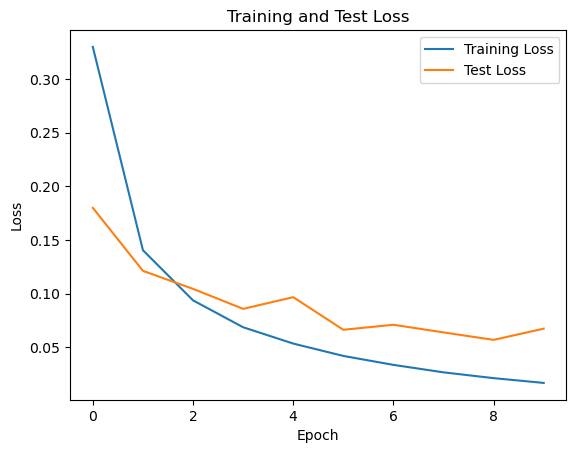

In [63]:
# Plot the training and test loss.
x = np.arange(0, num_epochs, 1)
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(x, training_loss_list, label='Training Loss')
plt.plot(x, test_loss_list, label='Test Loss')
plt.legend()
plt.show()

In [64]:
train_accuracy_list = metrics['accuracy']
test_accuracy_list = metrics['val_accuracy']

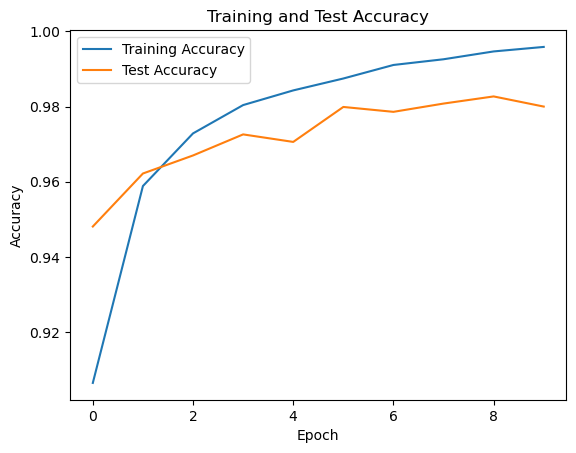

In [65]:
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, train_accuracy_list, label='Training Accuracy')
plt.plot(x, test_accuracy_list, label='Test Accuracy')
plt.legend()
plt.show()

## 4. Make a Prediction

---



Once our model is trained, we can use it to make predictions. To do this, we first use our test set to predict the classes.

In [66]:
# Make predictions with the trained model.
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Finally, we can show a random test image with its corresponding prediction.

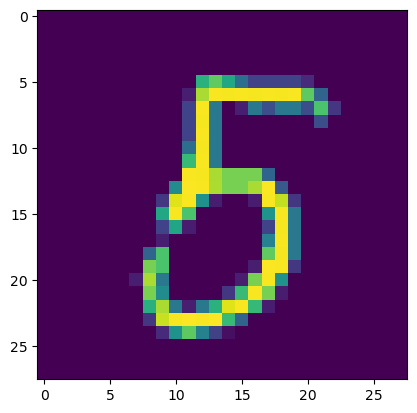

In [67]:
# Choose an index.
index = 45

# Show an image from the test set.
plt.imshow(test_images[index])
plt.show()

In [68]:
predictions[index]

array([3.92864195e-06, 1.92067219e-07, 1.26113889e-07, 1.14446404e-04,
       4.19330739e-08, 9.99537826e-01, 1.67645732e-04, 2.91524263e-08,
       1.72926448e-04, 2.79903338e-06], dtype=float32)

In [69]:
print("Prediction:", np.argmax(predictions[index]))

Prediction: 5
